Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from google.colab import drive

Loading the dataset

In [ ]:
# from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
aparts_df = pd.read_csv('/content/drive/MyDrive/rent_apts.csv')

Exploring the dataset

In [ ]:
#Shape of the dataset, rows and columns respectively.
aparts_df.shape

(1848, 7)

In [ ]:
aparts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   object 
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 101.2+ KB


# Data cleaning and wrangling

In [ ]:

#first we shall remove the KSh sign and the comma (KSh 50,000)
aparts_df['Price'].str.replace('KSh','',regex=True).str.replace(',','')

0        155000
1        100000
2         75000
3        135000
4         50000
         ...   
1843     180000
1844     180000
1845     180000
1846     180000
1847     180000
Name: Price, Length: 1848, dtype: object

In [ ]:
#the price column is an object type, we shall convert it to integer
aparts_df['Price'] = aparts_df['Price'].str.replace('KSh','',regex=True).str.replace(',','').astype(int)

In [ ]:
aparts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   int64  
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 101.2+ KB


In [ ]:
aparts_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1848.0,97343.881494,40241.322051,12000.0,70000.0,95000.0,130000.0,280000.0
sq_mtrs,1846.0,327.226977,2048.784581,0.0,2.0,3.0,4.0,40470.0
Bedrooms,1845.0,2.577778,0.819399,0.0,2.0,3.0,3.0,6.0
Bathrooms,1557.0,2.595376,1.000349,1.0,2.0,2.0,3.0,6.0


In [ ]:
#Check for null values
aparts_df.isnull().sum()

Agency            0
Neighborhood      0
Price             0
link              0
sq_mtrs           2
Bedrooms          3
Bathrooms       291
dtype: int64

In [ ]:
#We can see that the bathroom column has quite a number of missing values
#Lets first remove rows(houses) that dont have sq_mtrs and bedrooms
aparts_df.dropna(subset=['sq_mtrs','Bedrooms'],inplace=True)

In [ ]:
aparts_df.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands",155000,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North",100000,/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000,/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North",135000,/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000,/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [ ]:
#check for houses that have missing bathrooms as null values
aparts_df[aparts_df['Bathrooms'].isnull()]

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000,/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN
5,Lizmor Properties,"Waiyaki Way, Westlands",150000,/listings/furnished-2-bedroom-apartment-for-re...,2.0,2.0,NaN
8,Pmc Estates Limited,"Thika Road, Thika Road",85000,/listings/4-bedroom-apartment-for-rent-thika-r...,4.0,4.0,NaN
19,Real Management Services 2002Limited,"Sports Road, Waiyaki Way, Westlands",13000,/listings/studio-apartment-for-rent-waiyaki-wa...,0.0,0.0,NaN
36,Cfs Homes,"Ruaka, Kiambaa",16000,/listings/1-bedroom-apartment-for-rent-ruaka-3...,1.0,1.0,NaN
...,...,...,...,...,...,...,...
1817,Capstone Properties,"General Mathenge, Westlands",175000,/listings/3-bedroom-apartment-for-rent-general...,3.0,3.0,NaN
1820,Cloud Real Estate,"General Mathenge, Westlands",175000,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,NaN
1833,Rainbow Properties Limited,"State House, Dagoretti North",180000,/listings/furnished-3-bedroom-apartment-for-re...,3.0,3.0,NaN
1843,Avic International,"Laikipia Road, Kileleshwa, Dagoretti North",180000,/listings/3-bedroom-apartment-for-rent-kileles...,3.0,3.0,NaN


In [ ]:
#Let's check the correlation
#we see the bathroom column has a good correlation with the price column
aparts_df.corr()

<ipython-input-118-9d7d44d45699>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  aparts_df.corr()


,Price,sq_mtrs,Bedrooms,Bathrooms
Price,1.000000,-0.026958,0.358538,0.440472
sq_mtrs,-0.026958,1.000000,-0.007654,0.003311
Bedrooms,0.358538,-0.007654,1.000000,0.731506
Bathrooms,0.440472,0.003311,0.731506,1.000000


In [ ]:

#We shall group the houses by the number of bedrooms and fill the missing values
#with the mean of the bathrooms in each group, rounded to whole numbers
aparts_df.groupby('Bedrooms')['Bathrooms'].transform(lambda x: x.fillna(round(x.mean())))

0       4.0
1       4.0
2       5.0
3       4.0
4       3.0
       ... 
1843    3.0
1844    2.0
1845    5.0
1846    4.0
1847    2.0
Name: Bathrooms, Length: 1845, dtype: float64

In [ ]:
aparts_df['Bathrooms'] = aparts_df.groupby('Bedrooms')['Bathrooms'].transform(lambda x: x.fillna(round(x.mean())))

In [ ]:
#Recheck for missing values
aparts_df.isnull().sum()

Agency          0
Neighborhood    0
Price           0
link            0
sq_mtrs         0
Bedrooms        0
Bathrooms       0
dtype: int64

In [ ]:
#Notice that we won't need some of the columns to train our model; those are Agency, Neighborhood, and links.
#You also notice that sq_mtrs column is not correlated with any of the columns in our data.
#Remove non-required columns
del aparts_df["Agency"]
del aparts_df["Neighborhood"]
del aparts_df["link"] 
del aparts_df["sq_mtrs"]

# Visualising the data




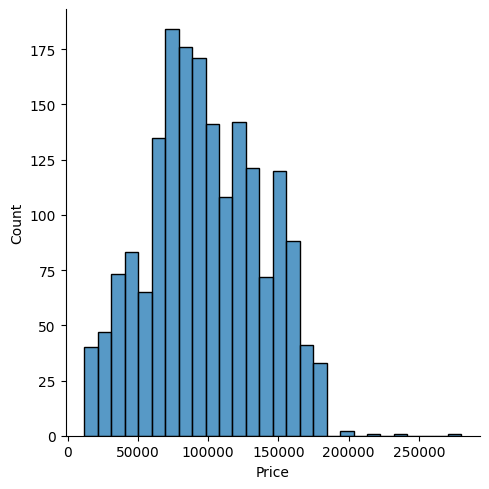

In [ ]:
#Lets first check the distribution of the price column
sns.displot(aparts_df['Price'])

In [ ]:
#lets check the houses that are outliers (200000 and above))
aparts_df[aparts_df['Price']>=200000]

,Price,Bedrooms,Bathrooms
14,220000,3.0,3.0
34,200000,3.0,3.0
64,280000,3.0,3.0
94,200000,5.0,5.0
158,240000,3.0,2.0


<Axes: xlabel='Bedrooms', ylabel='Price'>

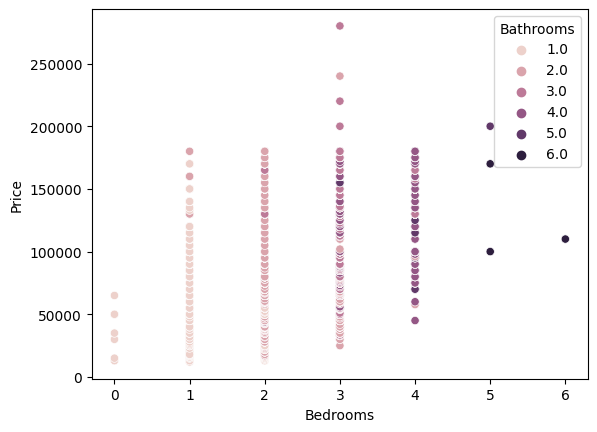

In [ ]:
#scatterplot for price  and bedrooms by bathrooms
sns.scatterplot(x='Bedrooms',y='Price',data=aparts_df,hue='Bathrooms')

In [ ]:
#we notice that the houses  are expensive when they have more bedrooms and bathrooms
#Lets check the scatterplot of the sq_mtrs column with price
#sns.scatterplot(x='sq_mtrs',y='Price',data=aparts_df)

In [ ]:
#Lets drop houses with 0 sq_mtrs, for more accurate data
#aparts_df.drop(aparts_df[aparts_df['sq_mtrs']==0].index,inplace=True)

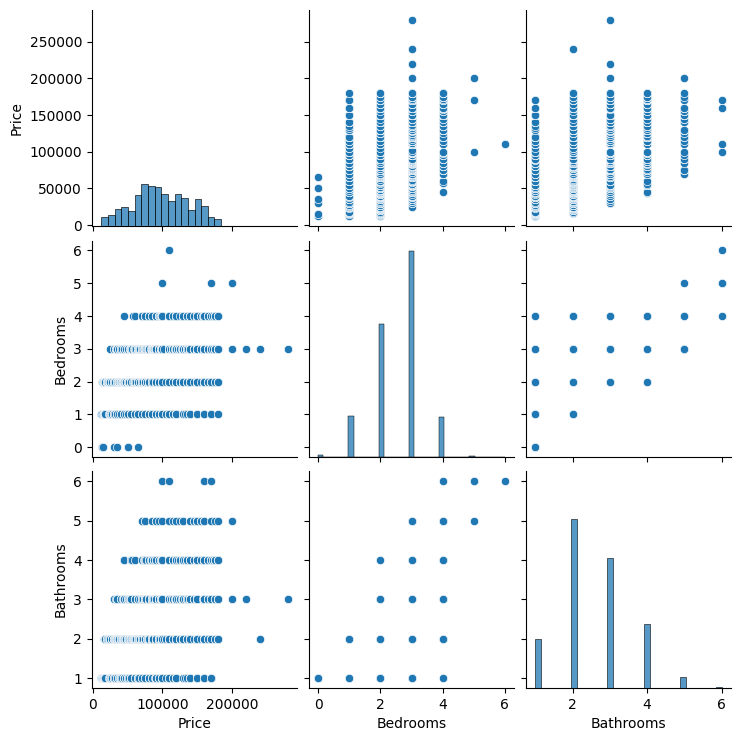

In [ ]:
#generate a pairplot on price, bedrooms, bathrooms and sq_mtrs
sns.pairplot(aparts_df[['Price','Bedrooms','Bathrooms']])

## Conclusion
The houses with more bedrooms and bathrooms are more expensive


In [ ]:
aparts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1845 entries, 0 to 1847
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1845 non-null   int64  
 1   Bedrooms   1845 non-null   float64
 2   Bathrooms  1845 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 57.7 KB


# Set features and labels

In [ ]:
X = aparts_df[["Bedrooms", "Bathrooms"]]
y = aparts_df[["Price"]]

# Define the model and train it

In [ ]:
#Spliting the data into training and testing the set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
#Train the regression model using the training data 
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor()

# Prediction and accuracy

In [ ]:
#Predictions using the testing set 
y_pred = clf.predict(X_test)

# #Example of few predictions
# print("Making predictions for the following 5 houses:")
# print(X.head())
# print("The predictions are")
# five_pred= clf.predict(X_test)[:5]

# five_pred

In [ ]:
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)


(369, 2)
(369, 1)
(369,)


In [ ]:
# print("Making predictions for the following 5 houses:")
# print(X.head())
# print("The predictions are")
# str(y_test[:5])

In [ ]:
#Checking the accuracy of the model using MSE,MAE and R-squared error

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print("Root Mean Squared error", np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('R-squared score: ', r2_score(y_test, y_pred))


Mean squared error:  2011395620.897012
Root Mean Squared error 44848.58549494077
Mean absolute error:  36970.72219650803
R-squared score:  -0.19964906224717005


In [ ]:
# trying new model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, tol=1e-3, loss="squared_error"))


In [ ]:
clf.fit(X_train, y_train)
forestPred = clf.predict(X_test)
forestScores = clf.score(X_test, y_test)
forestScores

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.24033716227251667

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

44848.58549494077

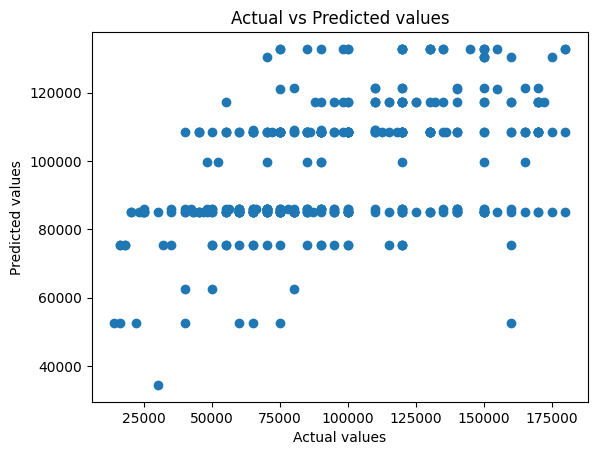

In [ ]:
#using a scatter plot to visualize how well the model is perfoming
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()


In [ ]:
# from sklearn.model_selection import cross_val_score
#  #Cross-validate the model
#  #Perform cross-validation on the model
# scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')
# rmse_scores = np.sqrt(-scores)

#  # Display the cross-validation scores
# print('Cross-Validation Scores:', rmse_scores)
# print('Mean:', rmse_scores.mean())
# print('Standard deviation:', rmse_scores.std())
